In [8]:
!pip install qiskit qiskit_aer matplotlib pylatexenc --quiet

# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))


def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc


def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()


if __name__ == "__main__":
    marked_state = "101"
    print("🔍 Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)


🔍 Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [9]:
!pip install qiskit qiskit_aer matplotlib --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt
from IPython.display import Image

# Ensure plots show inline
%matplotlib inline

# --------------------------
# Oracle + Diffuser
# --------------------------
def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state, iterations=1):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

def run_simulation(qc, noisy=False):
    sim = AerSimulator()
    transpiled = transpile(qc, sim)
    if noisy:
        noise = NoiseModel()
        noise.add_all_qubit_quantum_error(depolarizing_error(0.03, 1), ['x','h'])
        noise.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ['cx'])
        result = sim.run(transpiled, shots=512, noise_model=noise).result()
    else:
        result = sim.run(transpiled, shots=512).result()
    return result.get_counts()

def show_hist(counts, title):
    fig = plot_histogram(counts, title=title)
    fig.savefig("hist.png", bbox_inches='tight')
    plt.close(fig)
    display(Image("hist.png"))


# **Task 1:Change the marked state**


1️⃣ Task 1 — Try marked states: |001⟩, |111⟩, |010⟩

🔹 Grover for |001⟩


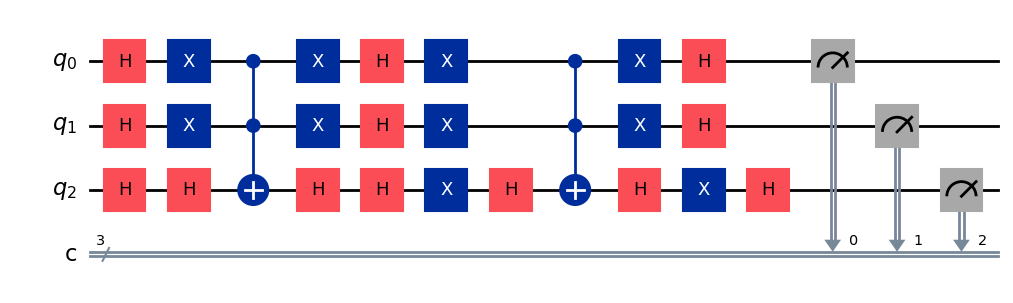

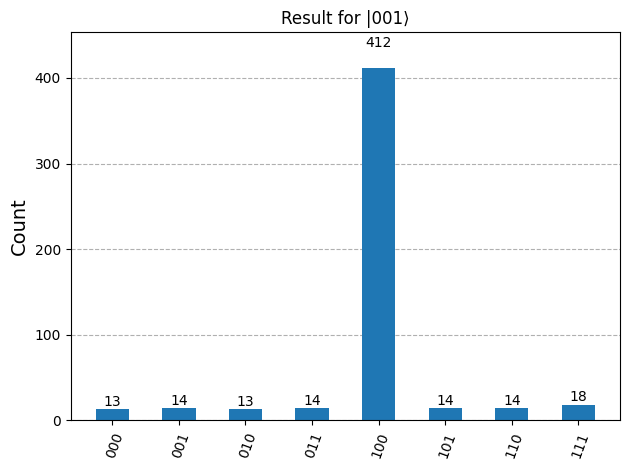


🔹 Grover for |111⟩


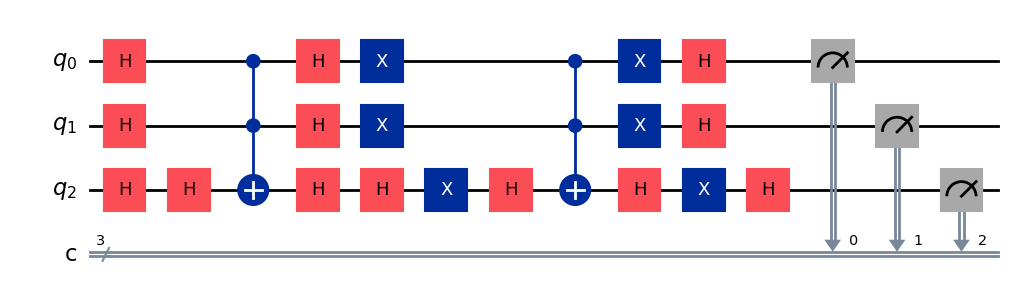

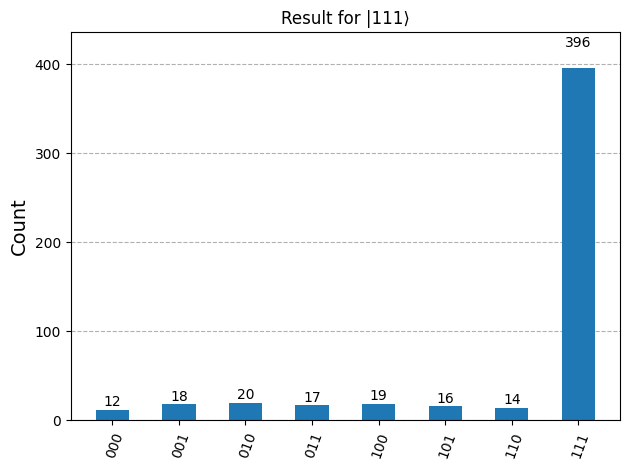


🔹 Grover for |010⟩


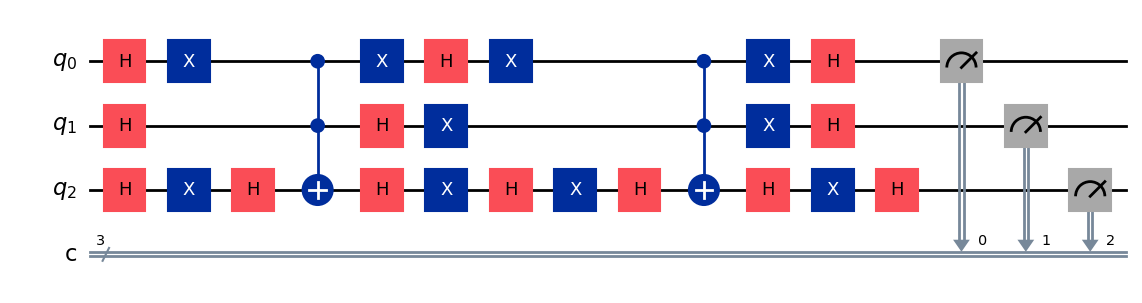

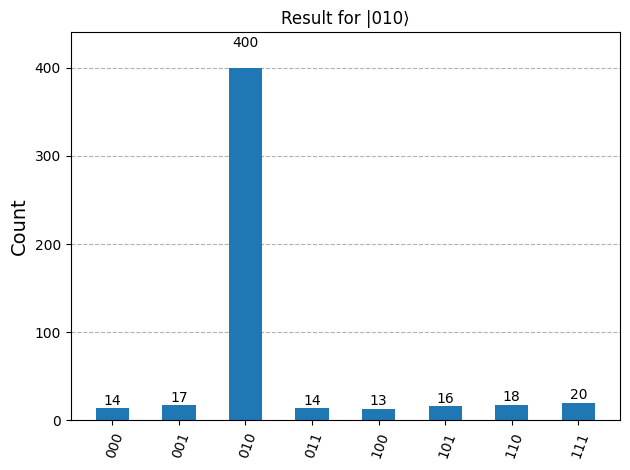

In [10]:

# 1️⃣ Multiple marked states
for state in ["001", "111", "010"]:
    print(f"\n🔹 Grover for |{state}⟩")
    qc = grover_search(state)
    display(qc.draw("mpl"))
    counts = run_simulation(qc)
    show_hist(counts, f"Result for |{state}⟩")


# **Task 2:Modify the number of qubits(4)**


2️⃣ Task 2 — Extend to 4 Qubits, |1101⟩


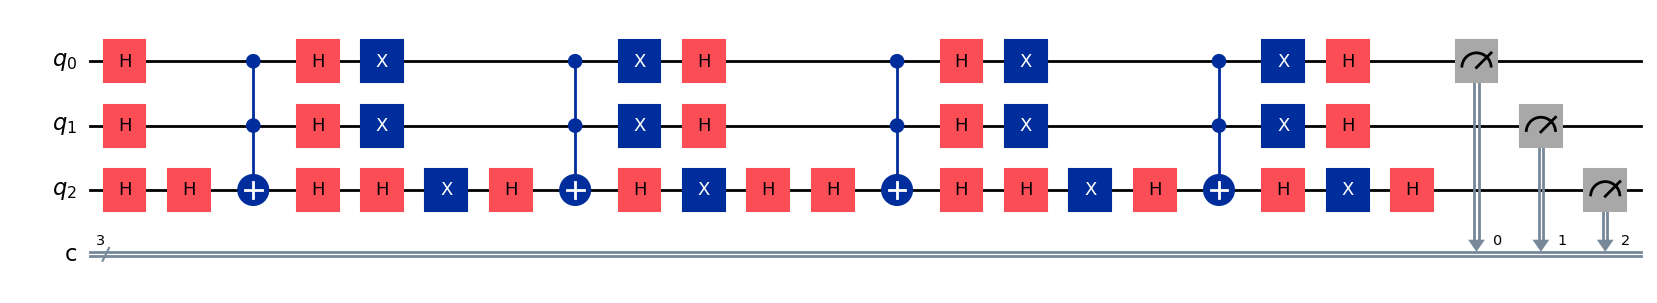

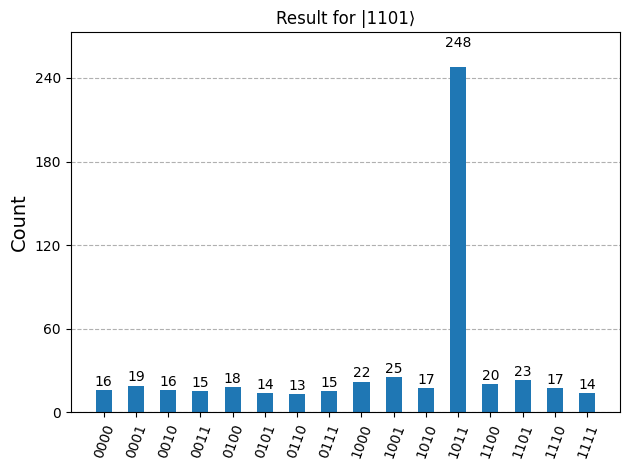

In [11]:

# 2️⃣ Extend to 4 qubits
qc2 = grover_search("1101")
display(qc3.draw("mpl"))
show_hist(run_simulation(qc2), "Result for |1101⟩")


# **Task 3:Add multiple iterations**


3️⃣ Task 3 — Run with 2 iterations for |111⟩


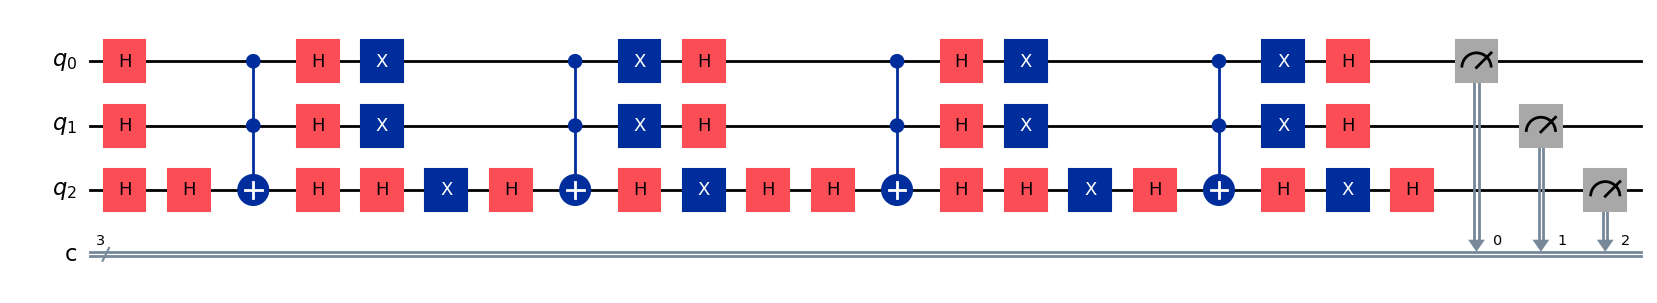

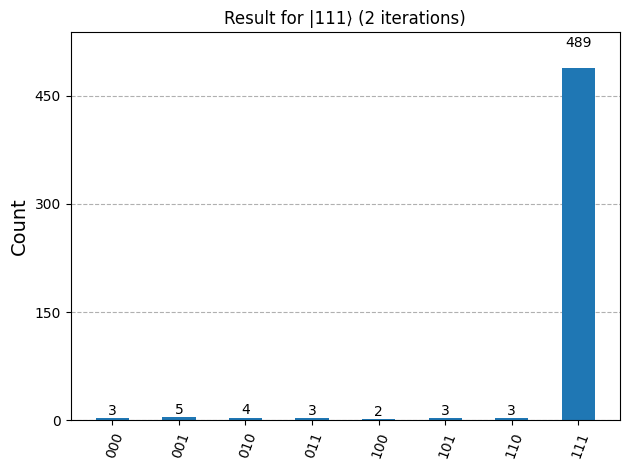

In [12]:

# 3️⃣ Multiple iterations
print("\nRun with 2 iterations for |111⟩")
qc3 = grover_search("111", iterations=2)
display(qc3.draw("mpl"))
show_hist(run_simulation(qc3), "Result for |111⟩ (2 iterations)")


# **Task 4:Circuit Visualization**


4️⃣ Task 4 — Circuit Visualization for |010⟩


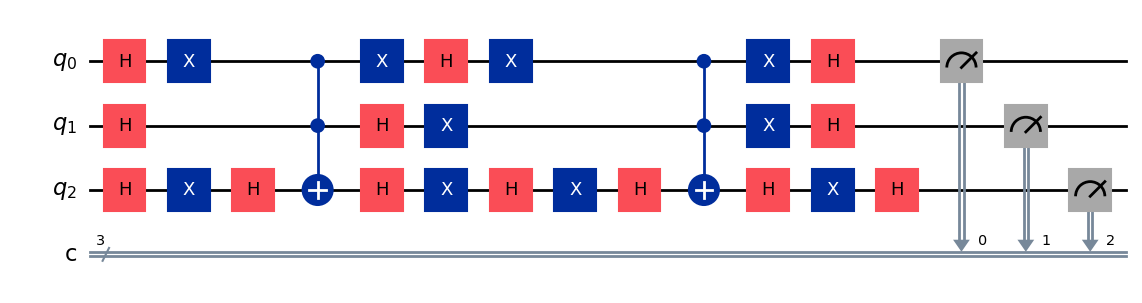

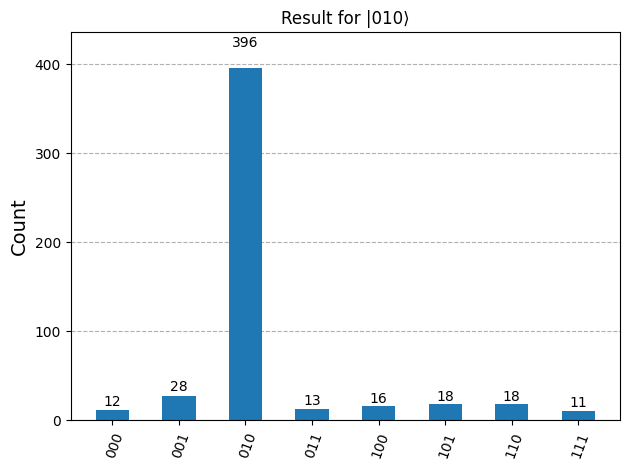

In [13]:

# 4️⃣ Visualize circuit
print("\nCircuit Visualization for |010⟩")
qc4 = grover_search("010")
display(qc4.draw("mpl"))
show_hist(run_simulation(qc4), "Result for |010⟩")


# **Task 5:Experiment with Noise**


5️⃣ Task 5 — Ideal vs Noisy Comparison for |101⟩


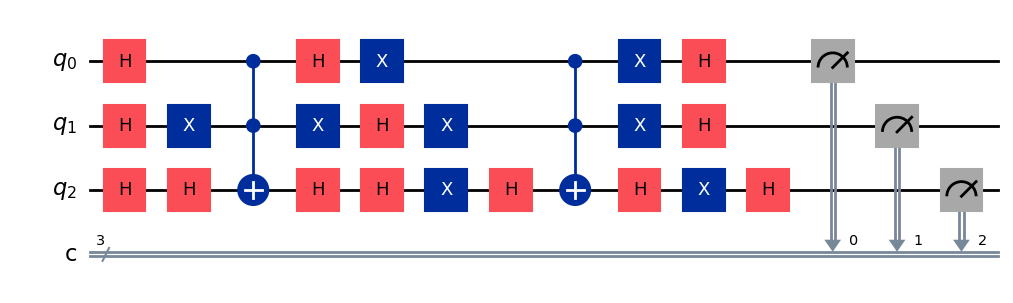

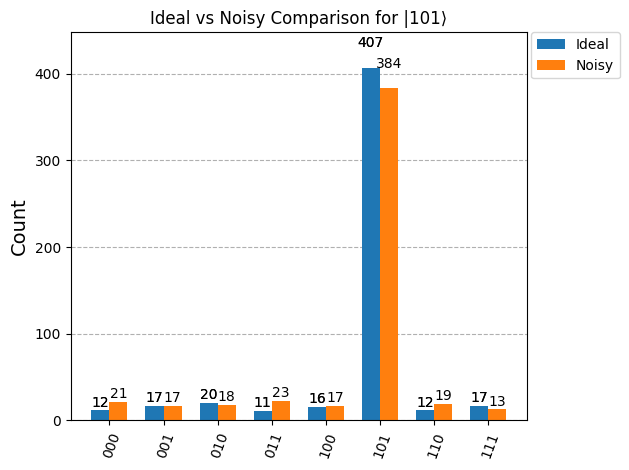


✅ All 5 student tasks executed successfully!


In [14]:

# 5️⃣ Ideal vs Noisy comparison
print("\n5️⃣ Task 5 — Ideal vs Noisy Comparison for |101⟩")
qc5 = grover_search("101")
display(qc5.draw("mpl"))
ideal = run_simulation(qc5, noisy=False)
noisy = run_simulation(qc5, noisy=True)
fig = plot_histogram([ideal, noisy],
                     legend=["Ideal", "Noisy"],
                     title="Ideal vs Noisy Comparison for |101⟩")
fig.savefig("compare.png", bbox_inches='tight')
plt.close(fig)
display(Image("compare.png"))

print("\n✅ All 5 student tasks executed successfully!")
